# Dependencies and settings

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

2022-01-02 15:54:01.218626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-02 15:54:01.218705: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# version check
!python3 --version
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)


Python 3.8.10
Numpy 1.21.5
TensorFlow 2.7.0
Keras 2.7.0


In [5]:
# trigonometric function settings

sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set
tf_model_name = 'sinosoidal'


# Random function generation with noise

In [6]:
# random sample generation

np.random.seed(1234)
total_size = sample_num
x_val = np.random.uniform(low = (-2*math.pi), high = (2*math.pi), size = total_size)
np.random.shuffle(x_val)

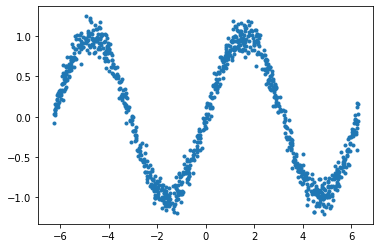

In [7]:
# noisy sinwave generator
y_val = np.sin(x_val) + (0.1 * np.random.randn(x_val.shape[0]))
plt.plot(x_val, y_val, '.');


# Training, Validation, and Test sets

In [8]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

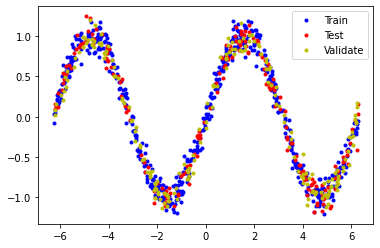

In [9]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()



# ANN Model

In [10]:
# model creation
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.summary()

2022-01-02 17:45:22.218566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-02 17:45:22.222481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-02 17:45:22.223955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-02 17:45:22.224339: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-02 17:45:22.224869: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 50)                850       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


# Training

In [9]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Training model
history = model.fit(x_train, y_train, epochs=1000, batch_size=100, validation_data=(x_val, y_val))


Epoch 1/1000
6/6 [==============================] - 2s 66ms/step - loss: 0.7686 - mae: 0.7686 - val_loss: 0.7424 - val_mae: 0.7424
Epoch 2/1000
6/6 [==============================] - 0s 29ms/step - loss: 0.6567 - mae: 0.6567 - val_loss: 0.6614 - val_mae: 0.6614
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6123 - mae: 0.6123 - val_loss: 0.6126 - val_mae: 0.6126
Epoch 4/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.5796 - mae: 0.5796 - val_loss: 0.5826 - val_mae: 0.5826
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.5539 - mae: 0.5539 - val_loss: 0.5733 - val_mae: 0.5733
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5493 - mae: 0.5493 - val_loss: 0.5681 - val_mae: 0.5681
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.5454 - mae: 0.5454 - val_loss: 0.5607 - val_mae: 0.5607
Epoch 8/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.5387 - ma

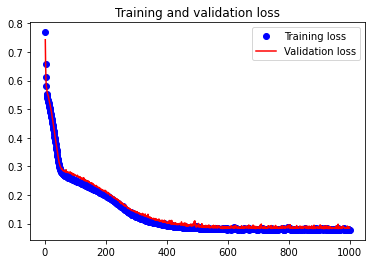

In [10]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

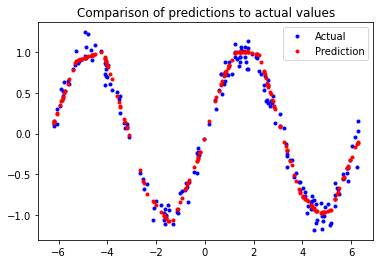

In [11]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [12]:
model.save('myModel.h5')

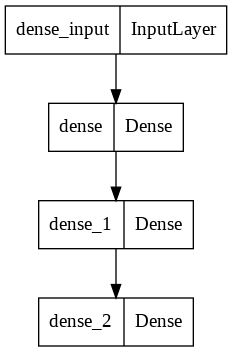

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')